In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dirty_iris.csv", na_values=[np.inf])
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [3]:
df1=df.dropna()
df1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
7,5.9,3.0,5.1,1.8,virginica
...,...,...,...,...,...
143,6.3,2.9,5.6,1.8,virginica
144,5.7,2.5,5.0,2.0,virginica
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor


### Calculate the number and percentage of observations that are complete.

In [4]:
(df1.shape[0] / df.shape[0]) * 100

63.33333333333333

In [5]:
df["Petal.Width"].unique()

array([1.5, 2.5, 2.3, 0.4, 1. , 0.2, nan, 1.8, 0.6, 1.6, 1.4, 1.3, 0.1,
       2.1, 2. , 1.2, 1.9, 2.2, 0.3, 1.1, 1.7, 2.4, 0.5])

### Replace all the special values in data with NA.

In [6]:
df[df.iloc[:, :-1] < 0] = np.nan

In [7]:
df["Sepal.Width"].unique()

array([ 3.2,  3.3,  nan,  3.4,  2.6,  2.7,  3. ,  3.1,  3.5,  2.8,  3.9,
        4. ,  3.6, 29. ,  2.9,  2.2,  2.5,  4.2,  3.8,  2.3,  3.7,  4.1,
       30. ,  0. ])

### Find outliers in sepal length using boxplot and boxplot.stats

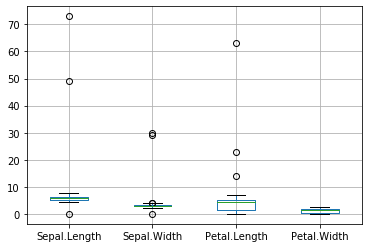

In [25]:
df.boxplot()

In [9]:
df_original = pd.read_csv("dirty_iris.csv")
df_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [10]:
set(df.Species)

{'setosa', 'versicolor', 'virginica'}

In [11]:
def check_label(df):
    species_check = lambda x : x in {'setosa', 'versicolor', 'virginica'}
    return df["Species"].apply(species_check)

In [12]:
label_check = check_label(df)

In [13]:
def check_positive(df):
    # positive=lambda x: (np.isfinite(x)&x>0) or x==np.isinf 
    pos = lambda x: x > 0
    and_lambda = lambda x: x[0] and x[1] and x[2] and x[3]
    return df.iloc[:, :-1].apply(pos).apply(and_lambda, axis=1)
    

In [14]:
positive_check = check_positive(df)

In [15]:
def check_petal_length(df):
    pl_check = lambda x: x[0] >= 2 * x[1]
    return df[["Petal.Length", "Petal.Width"]].apply(pl_check, axis=1)

In [16]:
petal_check = check_petal_length(df)

In [17]:
def check_sepal_length(df):
    return df["Sepal.Length"].apply(lambda x : x < 30)

In [18]:
sepal_check = check_sepal_length(df)

In [19]:
def sepal_length(df):
    pl_check = lambda x: x[0] > x[1]
    return df[["Sepal.Length", "Petal.Length"]].apply(pl_check, axis=1)

In [20]:
length_sepal = sepal_length(df)

### Determine how often each rule is broken (violatedEdits). Also summarize and plot the result.

In [21]:
print("No. of times rule 1 is broken: ", len(label_check) - label_check.value_counts().at[True])
print("No. of times rule 2 is broken: ", len(positive_check) - positive_check.value_counts().at[True])
print("No. of times rule 3 is broken: ", len(petal_check) - petal_check.value_counts().at[True])
print("No. of times rule 4 is broken: ", len(sepal_check) - sepal_check.value_counts().at[True])
print("No. of times rule 5 is broken: ", len(length_sepal) - length_sepal.value_counts().at[True])

No. of times rule 1 is broken:  0
No. of times rule 2 is broken:  58
No. of times rule 3 is broken:  34
No. of times rule 4 is broken:  12
No. of times rule 5 is broken:  30


In [22]:
r1=label_check.value_counts().at[True]
r2=positive_check.value_counts().at[True]
r3=petal_check.value_counts().at[True]
r4=sepal_check.value_counts().at[True]
r5=length_sepal.value_counts().at[True]

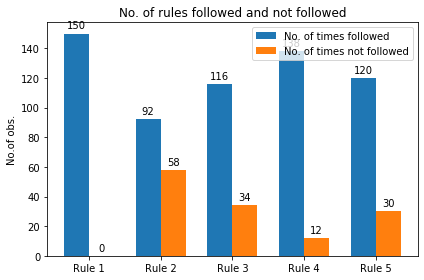

In [23]:
labels = ['Rule 1', 'Rule 2', 'Rule 3', 'Rule 4','Rule 5']
foll=[r1,r2,r3,r4,r5]
notfoll=[150-r1,150-r2,150-r3,150-r4,150-r5]
x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, foll, width, label='No. of times followed')
rects2 = ax.bar(x + width/2, notfoll, width, label="No. of times not followed")

ax.set_ylabel('No.of obs.')
ax.set_title('No. of rules followed and not followed')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()